<a href="https://colab.research.google.com/github/aduphad11/My-projects/blob/master/Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Mask Detection

# 1.Business/Real-world Problem

<h2> 1.1. Problem Statement and Motivation </h2>

Given an image or a video, the task is to predict people who are wearing masks and people without masks. 

The motivation behind this is the current situation of COVID-19. It is a very good real-world problem to be able to detect people wearing face masks.

<h2>1.2 Source </h2>

The dataset used can be downloaded from this link: https://www.kaggle.com/alexandralorenzo/maskdetection

After downloading the dataset, all the images were put into a folder named 'obj' along with the annotations for each image.

<h1>2. Deep Learning Problem</h1>

<h2>2.1. Data</h2>

1. Total number of Images present is 833 containing both people with and without masks
2. There are 2 classes. Mask and Without Mask
3. The dataset was divided into train and validation. 90% for train and 10% for test.

<h2>2.2. Type of Problem</h2>

It is a Object Detection Task with 2 classes/lables.

<h2>2.3. Approach</h2>

YOLO V3 by Darknet is used for this problem.

You only look once (YOLO) is a state-of-the-art, real-time object detection system.

<h1>3. Implementation</h1>

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 13661 (delta 0), reused 1 (delta 0), pack-reused 13658
Receiving objects: 100% (13661/13661), 12.24 MiB | 11.62 MiB/s, done.
Resolving deltas: 100% (9317/9317), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# make darknet (build)
!make

In [ ]:
#Functions required
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def imShow(path):
    '''
    Function to Display an image

    '''
    
    image = cv2.imread(path)
    height, width = image.shape[:2]
    resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

    fig = plt.gcf()
    fig.set_size_inches(18, 10)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.show()


def download(path):
    '''
    Function to download files from colab

    '''
    from google.colab import files
    files.download(path)

In [ ]:
#%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 Capture.PNG	    data.zip	   IMG_20170825_161110.jpg   yolov3
'Colab Notebooks'   IMG_1619.JPG   IMG_20170825_183012.jpg   yolov3_ts


In [ ]:
# All the necessary files stored in my drive
!ls /mydrive/yolov3

backups		   obj	     obj.names	weights
darknet53.conv.74  obj.data  obj.zip	yolov3_custom.cfg


In [ ]:
# this copies the zip file from my drive to the root directory of colab
!cp /mydrive/yolov3/obj.zip ../

In [ ]:
# this extracts the zip file from the root to the darknet/data directory
!unzip ../obj.zip -d data/

In [ ]:
#Creating two .txt files for train and validation containing the names of images respectively
import glob
import os

current_dir = 'data/obj'

#Percentage of images to be used for the valid set
percentage_test = 10;

# Create train.txt and valid.txt
file_train = open('data/train.txt', 'w')  
file_test = open('data/valid.txt', 'w')

# Populate train.txt and valid.txt

counter = 1  
index_test = round(100 / percentage_test)  
for file in glob.iglob(os.path.join(current_dir, '*.jpg')):  
    title, ext = os.path.splitext(os.path.basename(file))
    if counter == index_test:
        counter = 1
        file_test.write(current_dir + "/" + title + '.jpg' + "\n")
    else:
        file_train.write(current_dir + "/" + title + '.jpg' + "\n")
        counter = counter + 1

In [ ]:
# this copies the configuration file for yolo customized for the dataset from my drive to the darknet directory
!cp /mydrive/yolov3/yolov3_custom.cfg ./cfg

In [ ]:
# this copies the names and data files for yolo customized for the dataset from my drive to the darknet directory
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data

In [ ]:
# download pretrained convolutional layer weights such that the CONV layers don't initialize from scratch
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2020-06-10 10:00:51--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2020-06-10 10:00:52--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   102KB/s    in 38m 20s 

2020-06-10 10:39:14 (69.0 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
#this copies the weights to my drive
!cp darknet53.conv.74 /mydrive/yolov3/darknet53.conv.74

In [ ]:
# The below command trains on the dataset
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov3_custom
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 4, batch = 32, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 152 x 15

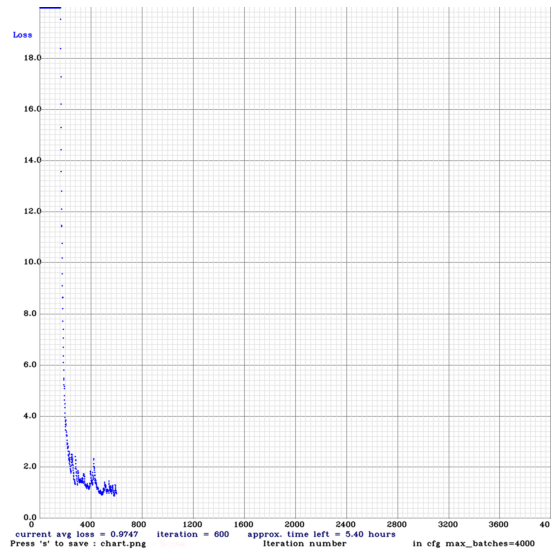

In [ ]:
imShow('chart.png')

We can see from the above plot that after about 300 epochs, the loss gets below 2.0 which is a good sign.

In [ ]:
#The following is used to re-run from the saved weights 
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backups/yolov3_custom_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000006, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000010, iou_loss = 0.000000, total_loss = 0.000010 
 total_bbox = 26602, rewritten_bbox = 0.101496 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.686230, GIOU: 0.674383), Class: 0.963547, Obj: 0.523609, No Obj: 0.000889, .5R: 1.000000, .75R: 0.333333, count: 3, class_loss = 0.276746, iou_loss = 0.282959, total_loss = 0.559705 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.451203, GIOU: 0.315381), Class: 0.477281, Obj: 0.000109, No Obj: 0.000025, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.353907, iou_loss = 0.303714, total_loss = 0.657621 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj:

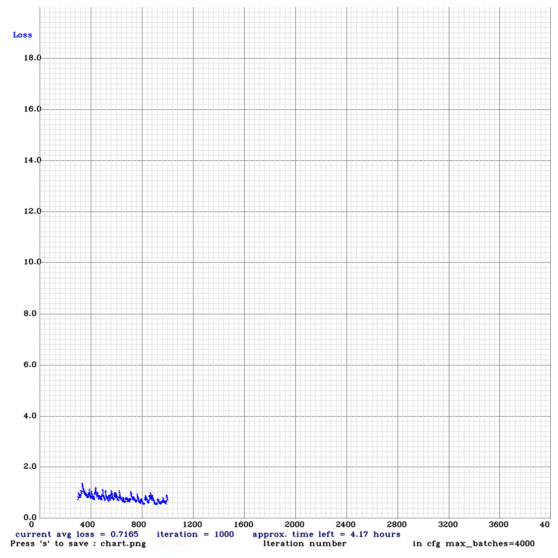

In [ ]:
imShow('chart.png')

The above plot is for the re-run. 

In [ ]:
# this sets the custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [ ]:
# this command is used to test on a particular image
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backups/yolov3_custom_1000.weights /content/Test_Image_1.jpg -thresh 0.3 -ext_output


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 152 x 152 x 128 0.003 B

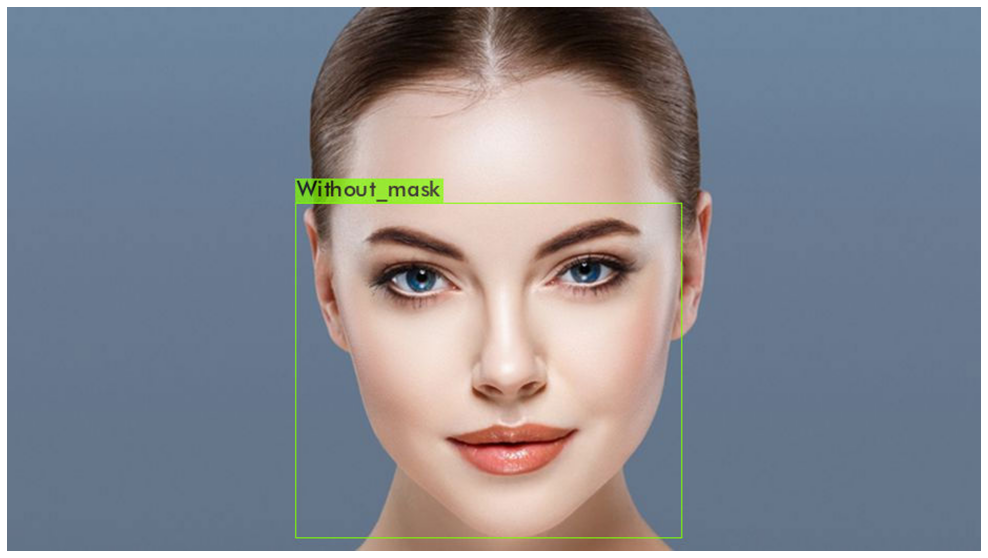

In [ ]:
imShow('predictions.jpg')

In [ ]:
download('predictions.jpg')

In [ ]:
# # this command is used to test on a particular image
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backups/yolov3_custom_1000.weights /content/Test_Image_2.jpg -thresh 0.3 -ext_output


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 152 x 152 x 128 0.003 

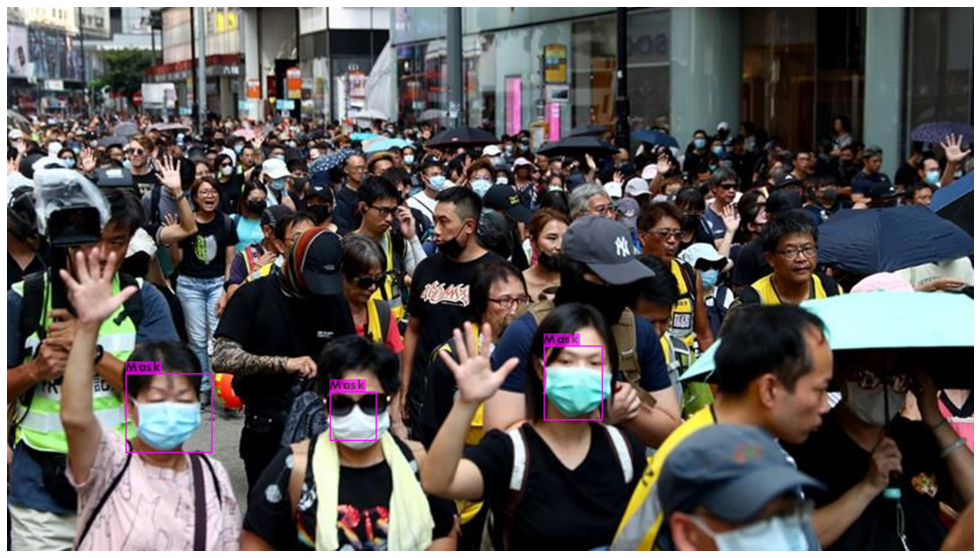

In [ ]:
imShow('predictions.jpg')

In [ ]:
# this command is used to test on a particular image
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backups/yolov3_custom_1000.weights /content/Test_Image_3.jpg -thresh 0.3 -ext_output


/bin/bash: ./darknet: No such file or directory


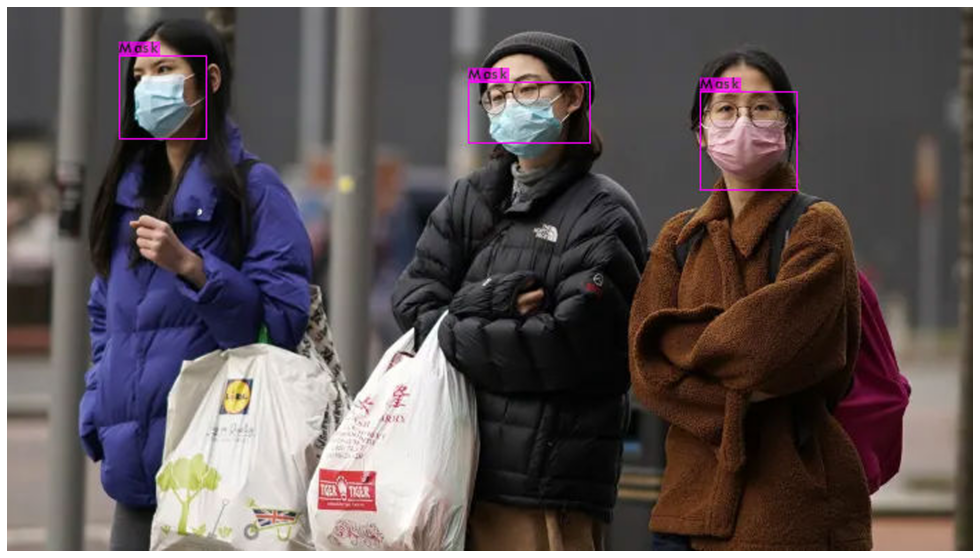

In [ ]:
imShow('predictions.jpg')

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector demo data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backups/yolov3_custom_last.weights -dont_show /content/test_video.mp4 i 0 -out_filename out.avi


<h1>4. Conclusion:</h1>

1. The model did fairly well with such a small dataset and only 1000 epochs of training.
2. A validation loss below 2.0 fairly works well.
3. The model can be improved by using a fairly large dataset with variations of images. The dataset used to train in this implementation is very simple and most of the images contain a single person. In production scenario, large dataset is a must with variations in images. 
4. Also training for more number of epochs should give better results. 
5. Also experimenting with other complex models like R-CNNs might give better results.

<h1>5. References:</h1>

1. https://colab.research.google.com/drive/1lTGZsfMaGUpBG4inDIQwIJVW476ibXk_
2. https://pjreddie.com/darknet/yolo/
3. https://medium.com/@anirudh.s.chakravarthy/training-yolov3-on-your-custom-dataset-19a1abbdaf09